In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm

from tqdm.notebook import tqdm, trange


<Figure size 640x480 with 0 Axes>

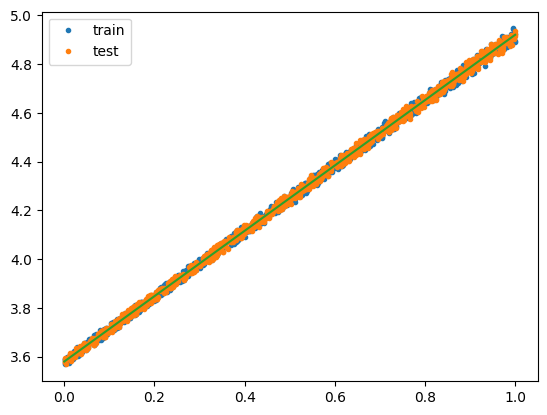

<Figure size 640x480 with 0 Axes>

In [2]:
a_const = 1.34
sigma_a = 0.02
b_const = 3.58
sigma_b = 0.02

n_samples = 1000

x_train = np.random.uniform(0, 1, n_samples)
y_train = x_train * np.random.uniform(a_const - sigma_a, a_const + sigma_a, n_samples) + np.random.uniform(b_const - sigma_b, b_const + sigma_b, n_samples)
x_test = np.random.uniform(0, 1, n_samples)
y_test = x_test * np.random.uniform(a_const - sigma_a, a_const + sigma_a, n_samples) + np.random.uniform(b_const - sigma_b, b_const + sigma_b, n_samples)


plt.plot(x_train, y_train, '.', label='train')
plt.plot(x_test, y_test, '.', label='test')
plt.plot([0, 1], [b_const, a_const + b_const])
plt.legend()
plt.figure()

In [3]:
def result_function(x, p):
    return p[0] * x + p[1]

def loss_function(x_train, y_train, p):
    return np.mean([np.abs(result_function(x, p) - y) for x, y in zip(x_train, y_train)])

  0%|          | 0/50 [00:00<?, ?it/s]

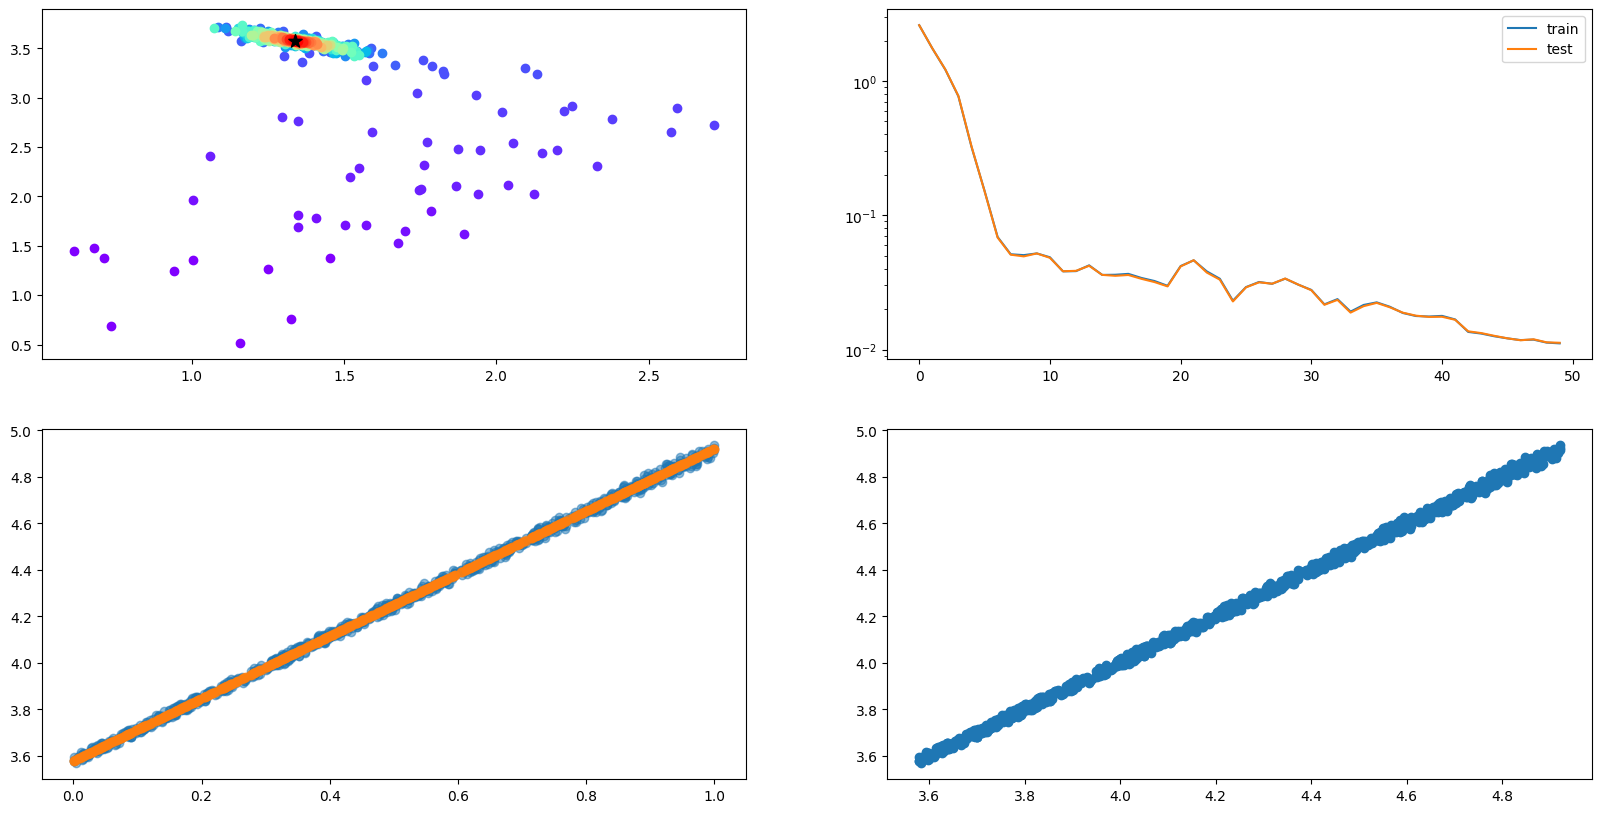

In [15]:
def natural_selection_step(x_train, y_train, p_set, temperature):
    if temperature > 1:
        raise RuntimeError
    reproduction_rate = 10
    size_filter = 10
    p_set_new = []
    for p in p_set:
        p = np.array(p)
        for i in range(reproduction_rate):
            p_set_new.append(p + (np.random.rand(p.size) - 0.5) * temperature)

    return np.array(
        sorted(p_set_new, key=lambda p: loss_function(x_train, y_train, p))[:size_filter]
    )


fix, ax = plt.subplots(figsize=[20,10], ncols=2, nrows=2)
ax_param_space = ax[0][0]
ax_loss_history = ax[0][1]
ax_see_result = ax[1][0]
ax_results_cross = ax[1][1]

p_set = np.array([[1, 1]])
n_epochs = 50
colors = cm.rainbow(np.linspace(0, 1, n_epochs))
loss_history_train = []
loss_history_test = []
for epoch in trange(n_epochs):
    p_set = natural_selection_step(x_train, y_train, p_set, (n_epochs - epoch) / n_epochs)
    ax_param_space.scatter(*(p_set.transpose()), color=colors[epoch])
    loss_history_train.append(np.mean([loss_function(x_train, y_train, p) for p in p_set]))
    loss_history_test.append(np.mean([loss_function(x_test, y_test, p) for p in p_set]))
ax_param_space.scatter(a_const, b_const, marker='*', c='k', s=100)

ax_loss_history.plot(loss_history_train, label='train')
ax_loss_history.plot(loss_history_test, label='test')
ax_loss_history.set_yscale('log')
ax_loss_history.legend()

ax_see_result.scatter(x_test, y_test, alpha=0.5)
ax_see_result.scatter(x_test, p_set[0][0] * x_test + p_set[0][1], alpha=0.5)

ax_results_cross.scatter(p_set[0][0] * x_test + p_set[0][1], y_test)

plt.show()
    

  0%|          | 0/50 [00:00<?, ?it/s]

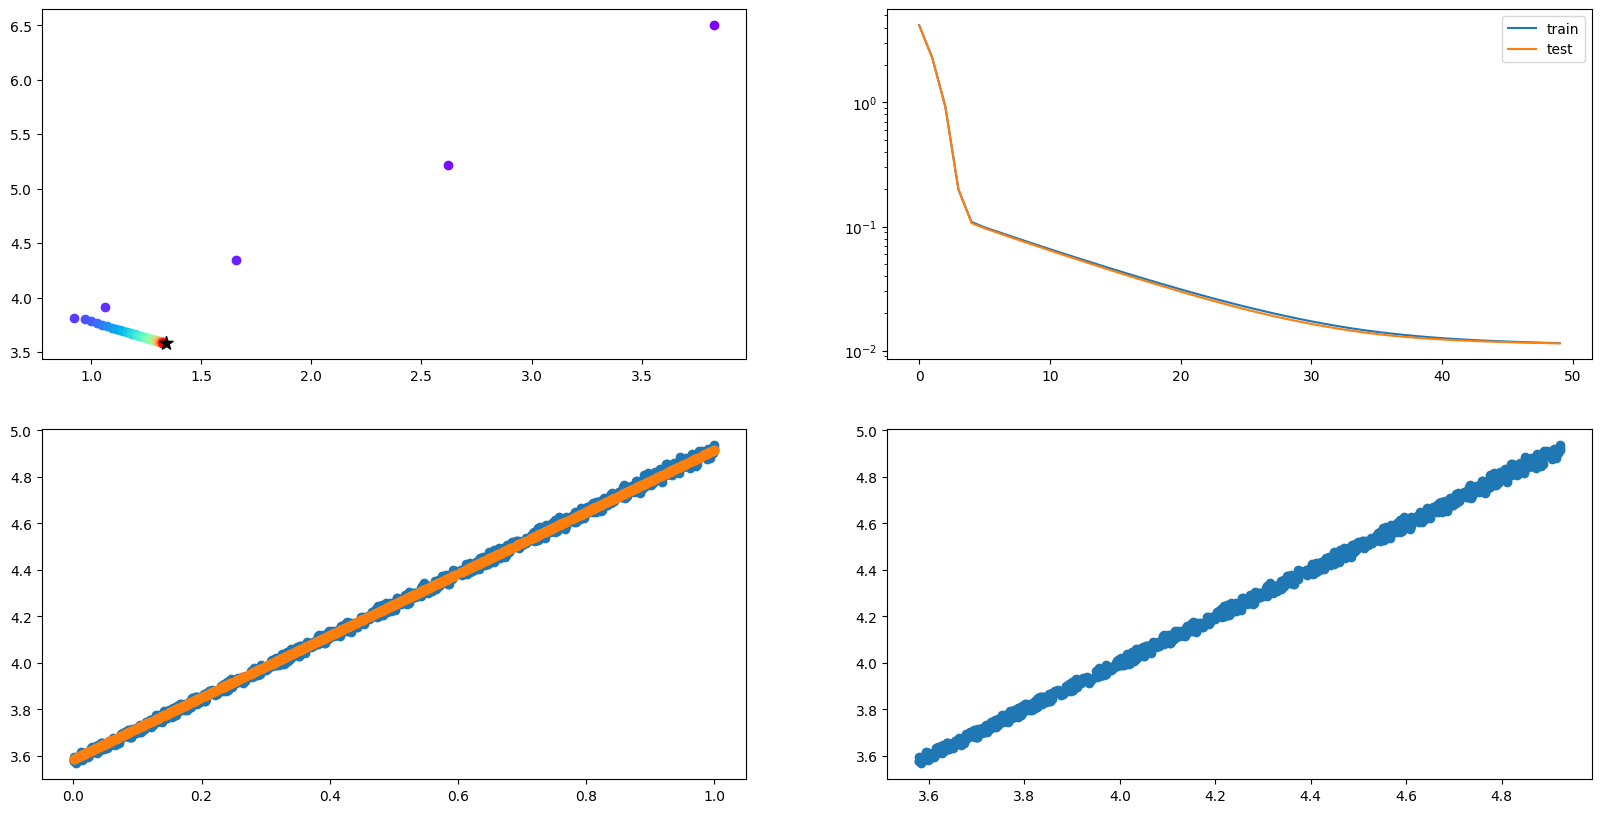

In [14]:
def gradient_descent_step(x_train, y_train, p):
    '''
    assuming loss L = (y - (ax + b))**2
    '''
    list_dLda = []
    list_dLdb = []
    a, b = p
    for x, y in zip(x_train, y_train):
        list_dLda.append(2 * x * (a*x + b - y))
        list_dLdb.append(2 * (a*x + b - y))
    return [
        a - np.mean(list_dLda) / abs(a) if a != 0 else 0.1,
        b - np.mean(list_dLdb) / abs(b) if b != 0 else 0.1
    ]


fix, ax = plt.subplots(figsize=[20,10], ncols=2, nrows=2)
ax_param_space = ax[0][0]
ax_loss_history = ax[0][1]
ax_see_result = ax[1][0]
ax_results_cross = ax[1][1]

p = [1, 1]
n_epochs = 50
colors = cm.rainbow(np.linspace(0, 1, n_epochs))
loss_history_train = []
loss_history_test = []
for epoch in trange(n_epochs):
    p = gradient_descent_step(x_train, y_train, p)
    ax_param_space.scatter(*p, color=colors[epoch])
    loss_history_train.append(loss_function(x_train, y_train, p))
    loss_history_test.append(loss_function(x_test, y_test, p))
ax_param_space.scatter(a_const, b_const, marker='*', c='k', s=100)

ax_loss_history.plot(loss_history_train, label='train')
ax_loss_history.plot(loss_history_test, label='test')
ax_loss_history.set_yscale('log')
ax_loss_history.legend()

ax_see_result.scatter(x_test, y_test)
ax_see_result.scatter(x_test, p[0] * x_test + p[1])

ax_results_cross.scatter(p_set[0][0] * x_test + p_set[0][1], y_test)

plt.show()
    